In [1]:
# Import all necessary packages
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Read input train data

train = pd.read_csv("input/train.csv")
print(train.shape)
train.head()

(42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# Read input test data

test = pd.read_csv("input/test.csv")
print(test.shape)
test.head()

(28000, 784)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# Split train data and change types

X_train = (train.iloc[:, 1:].values).astype('float32')
y_train = train.iloc[:, 0].values.astype('int32')
X_test = test.values.astype('float32')

In [5]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [6]:
y_train

array([1, 0, 1, ..., 7, 6, 9], dtype=int32)

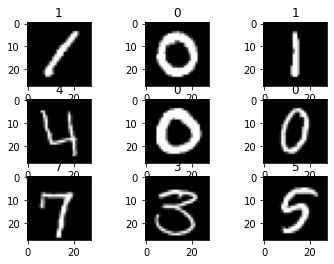

In [7]:
X_train = X_train.reshape(X_train.shape[0], 28, 28)

for i in range(9):
    plt.subplot(330 + (i + 1))
    plt.imshow(X_train[i], cmap = plt.get_cmap('gray'))
    plt.title(y_train[i]);

In [8]:
# Reshape train set

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_train.shape

(42000, 28, 28, 1)

In [9]:
# Reshape test set

X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
X_test.shape

(28000, 28, 28, 1)

In [10]:
# Standartize all values. It will be used as Lambda layer.

mean_px = X_train.mean().astype(np.float32)
std_px = X_train.std().astype(np.float32)

def standardize(x): 
    return (x - mean_px) / std_px

In [11]:
# One hot encoding

from keras.utils.np_utils import to_categorical
y_train = to_categorical(y_train)
num_classes = y_train.shape[1]
num_classes

10

In [12]:
# Fix random seed for reproducibility

seed = 42
np.random.seed(seed)

In [13]:
from keras.models import  Sequential
from keras.layers.core import  Lambda, Dense, Flatten, Dropout
from keras.layers import BatchNormalization, Convolution2D, MaxPooling2D

In [30]:
model = Sequential([
        Lambda(standardize, input_shape = (28, 28, 1)),

        Convolution2D(32, (3, 3), activation = 'selu'),

        BatchNormalization(axis = 1),
        Dropout(0.5),
    
        Convolution2D(32, (3, 3), activation = 'selu'),    
        
        MaxPooling2D(),
        
        BatchNormalization(axis = 1),
        Dropout(0.5),
        
        Convolution2D(64, (3, 3), activation = 'selu'),
        
        BatchNormalization(axis = 1),
        Dropout(0.5),
    
        Convolution2D(64, (3, 3), activation = 'selu'),    
        
        MaxPooling2D(),

        Flatten(),
        
        BatchNormalization(),
        
        Dense(512, activation = 'selu'),
        
        BatchNormalization(),
        
        Dense(10, activation = 'softmax')
        ])
print("Input shape ", model.input_shape)
print("Output shape ", model.output_shape)

Input shape  (None, 28, 28, 1)
Output shape  (None, 10)


In [31]:
LR = 0.001
BATCH_SIZE = 64
EPOCHS = 100
TEST_SIZE = 0.1

In [32]:
from keras.optimizers import Adam
model.compile(optimizer = Adam(lr = LR), loss = 'categorical_crossentropy', metrics=['accuracy'])

In [33]:
from keras.preprocessing import image

gen = image.ImageDataGenerator(rotation_range = 10,
                               zoom_range = 0.15,
                               width_shift_range = 0.15,
                               height_shift_range = 0.15,
                               shear_range = 0.15,
                               rescale = 0.15)

In [34]:
TEST_IMG = 3
print(np.argmax(y_train[TEST_IMG]))

8


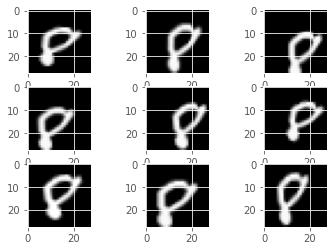

In [35]:
from numpy import expand_dims
from matplotlib import pyplot

data = X_train[TEST_IMG]
# expand dimension to one sample
samples = expand_dims(data, 0)
# prepare iterator
it = gen.flow(samples, batch_size = 1)

# generate samples and plot
for i in range(9):
    # define subplot
    pyplot.subplot(330 + 1 + i)
    # generate batch of images
    batch = it.next()
    # plot raw pixel data
    pyplot.imshow(batch[0].astype('uint8'), cmap = plt.get_cmap('gray'))

pyplot.show()

In [36]:
from sklearn.model_selection import train_test_split
X = X_train
y = y_train
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = TEST_SIZE, random_state = seed)
batches = gen.flow(X_train, y_train, batch_size = BATCH_SIZE)
val_batches = gen.flow(X_val, y_val, batch_size = BATCH_SIZE)

In [37]:
history = model.fit(batches,
                    steps_per_epoch = np.floor(batches.n / BATCH_SIZE),
                    epochs = EPOCHS,
                    validation_data = val_batches,
                    validation_steps = np.floor(val_batches.n / BATCH_SIZE))

Epoch 1/100
478/478 [==============================] - 6s 12ms/step - loss: 0.7393 - accuracy: 0.7670 - val_loss: 9.1520 - val_accuracy: 0.1229
Epoch 2/100
478/478 [==============================] - 5s 11ms/step - loss: 0.2338 - accuracy: 0.9273 - val_loss: 0.2964 - val_accuracy: 0.9060
Epoch 3/100
478/478 [==============================] - 5s 11ms/step - loss: 0.1649 - accuracy: 0.9479 - val_loss: 0.3723 - val_accuracy: 0.8788
Epoch 4/100
478/478 [==============================] - 5s 11ms/step - loss: 0.1352 - accuracy: 0.9577 - val_loss: 0.1067 - val_accuracy: 0.9670
Epoch 5/100
478/478 [==============================] - 5s 11ms/step - loss: 0.1187 - accuracy: 0.9632 - val_loss: 0.0780 - val_accuracy: 0.9767
Epoch 6/100
478/478 [==============================] - 5s 11ms/step - loss: 0.1045 - accuracy: 0.9684 - val_loss: 0.2041 - val_accuracy: 0.9387
Epoch 7/100
478/478 [==============================] - 5s 11ms/step - loss: 0.0983 - accuracy: 0.9703 - val_loss: 0.0736 - val_accuracy:

478/478 [==============================] - 5s 11ms/step - loss: 0.0406 - accuracy: 0.9876 - val_loss: 0.0270 - val_accuracy: 0.9923
Epoch 58/100
478/478 [==============================] - 5s 11ms/step - loss: 0.0476 - accuracy: 0.9867 - val_loss: 0.0283 - val_accuracy: 0.9909
Epoch 59/100
478/478 [==============================] - 5s 11ms/step - loss: 0.0430 - accuracy: 0.9863 - val_loss: 0.0345 - val_accuracy: 0.9894
Epoch 60/100
478/478 [==============================] - 5s 11ms/step - loss: 0.0450 - accuracy: 0.9870 - val_loss: 0.0277 - val_accuracy: 0.9926
Epoch 61/100
478/478 [==============================] - 5s 11ms/step - loss: 0.0431 - accuracy: 0.9875 - val_loss: 0.0327 - val_accuracy: 0.9903
Epoch 62/100
478/478 [==============================] - 5s 11ms/step - loss: 0.0431 - accuracy: 0.9873 - val_loss: 0.0368 - val_accuracy: 0.9891
Epoch 63/100
478/478 [==============================] - 5s 11ms/step - loss: 0.0444 - accuracy: 0.9866 - val_loss: 0.0295 - val_accuracy: 0.991

(0.0, 1.0)

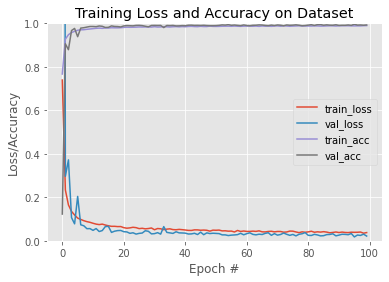

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline

history_dict = history.history
N = np.arange(0, EPOCHS)
plt.style.use('ggplot')
plt.figure()
plt.plot(N, history_dict['loss'], label = 'train_loss')
plt.plot(N, history_dict['val_loss'], label = 'val_loss')
plt.plot(N, history_dict['accuracy'], label = 'train_acc')
plt.plot(N, history_dict['val_accuracy'], label = 'val_acc')
plt.title('Training Loss and Accuracy on Dataset')
plt.xlabel('Epoch #')
plt.ylabel('Loss/Accuracy')
plt.legend(loc = 'center right')
plt.ylim((0.0, 1.0))

In [39]:
predictions = np.argmax(model.predict(X_test), axis = -1)

submissions = pd.DataFrame({"ImageId": list(range(1, len(predictions) + 1)),
                            "Label": predictions})

submissions.to_csv("prediction.csv", index = False, header = True)